In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Normal Equation

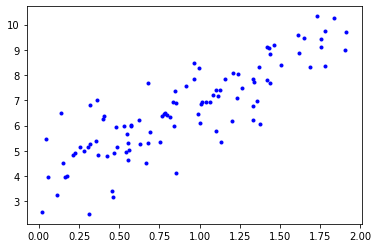

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.9391276 ],
       [2.94507741]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.9391276 ],
       [9.82928242]])

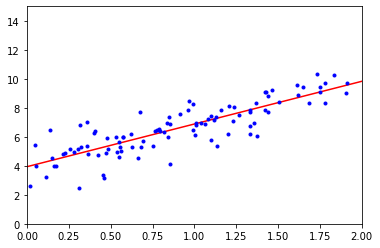

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9391276]), array([[2.94507741]]))

In [7]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.9391276 ],
       [2.94507741]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.9391276 ],
       [2.94507741]])

# Batch Gradient Descent

In [9]:
eta = 0.1 # Learning Rate 
n_iterations = 1000 
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations): 
    gradients= 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

theta

array([[3.9391276 ],
       [2.94507741]])

# Stochastic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t0 + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.02440649],
       [2.54889667]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.94979216]), array([2.99750504]))

# Polynomial Regression

In [12]:
m = 300
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2+ np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])


[-2.5393215]
[-2.5393215  6.4481537]


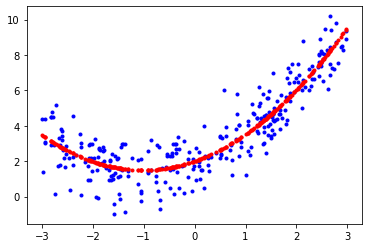

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

plt.plot(X, y, "b.")
plt.plot(X, lin_reg.coef_[0, 1]* X **2 + lin_reg.coef_[0, 0]* X + lin_reg.intercept_, 'r.')
plt.show()

# Learning Curves

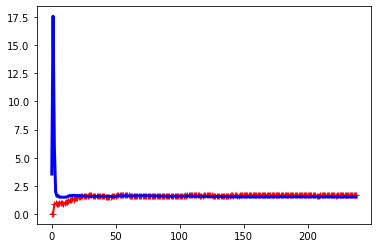

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    train_errors , val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    return plt

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y).show()

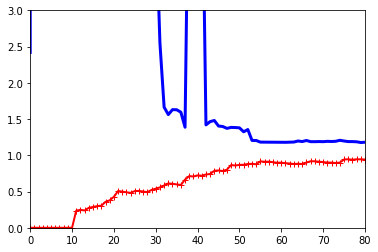

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plt = plot_learning_curves(polynomial_regression, X, y)
plt.xlim(0, 80)
plt.ylim(0, 3)
plt.show()

# Ridge Regressions

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.02971323]])

In [17]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.04682937])

# Lasso 

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.98470872])

In [19]:
sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.0436795])

# Elastic Net

In [20]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.98542749])

# Early Stopping

In [29]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Preparing the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.fit_transform(x_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                        penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch, best_model = None, None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Sigmoidal Function

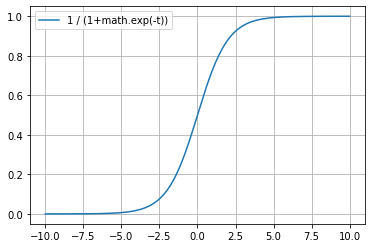

In [53]:
import math

sig_x = list(map(lambda n: n / 10, range(-100, 101)))
sig_y = [1/(1+math.exp(-t)) for t in sig_x]
plt.plot(sig_x, sig_y, label = "1 / (1+math.exp(-t))")
plt.grid()
plt.legend()
plt.show()

# Logit

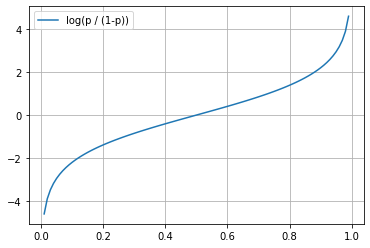

In [55]:
log_x = list(map(lambda n: n / 100, range(1, 100)))
log_y = [math.log(p / (1-p)) for p in log_x]
plt.plot(log_x, log_y, label = "log(p / (1-p))" )
plt.grid()
plt.legend()
